In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import pickle

In [2]:
data = pd.read_csv(r"C:\Users\91915\Downloads\Telegram Desktop\winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.columns


Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [4]:
data_cat = data.select_dtypes(include='object')
data_cat.head()

,type
0,white
1,white
2,white
3,white
4,white


C:\Users\91915\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


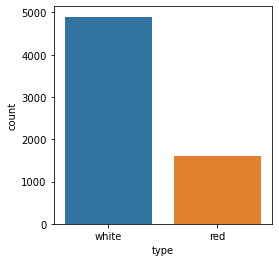

In [5]:
plt.figure(figsize=(18,4))
for i,j in enumerate(data_cat):
    plt.subplot(1,4,i+1)
    sns.countplot(data[j])

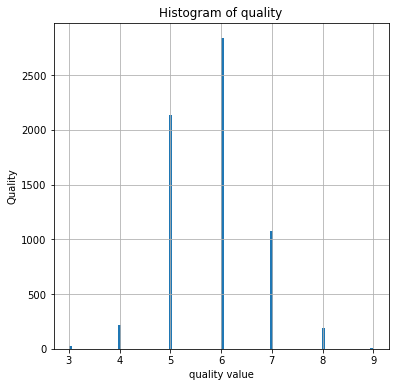

In [6]:
axarr = data.hist(column=['quality'],bins=100, figsize=(6,6))
ax = axarr.flatten()[0]
ax.set_xlabel(f"{ax.get_title()} value")
ax.set_ylabel("Quality")
title = ax.get_title()
ax.set_title(f"Histogram of {title}")
plt.show()

C:\Users\91915\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


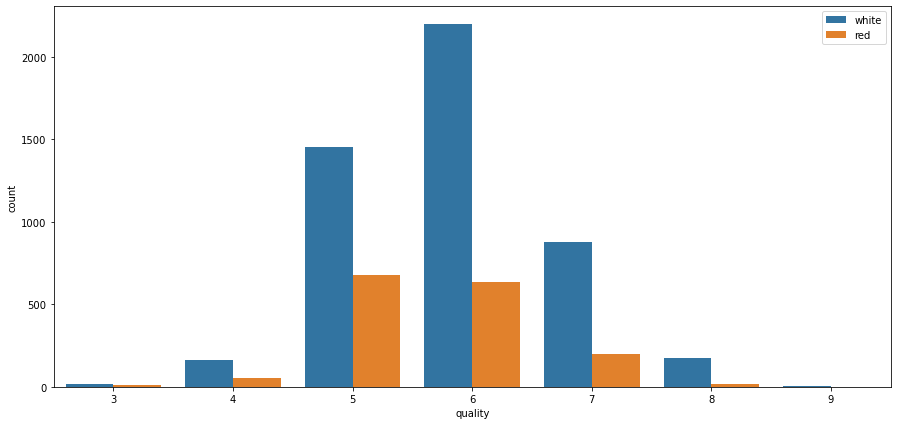

In [7]:
plt.figure(figsize=(15,7))
sns.countplot(data['quality'],hue=data['type'])
plt.legend(loc='upper right')

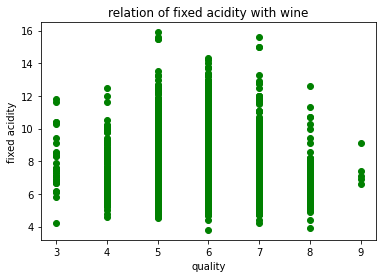

In [8]:
plt.scatter(data['quality'],data['fixed acidity'],color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

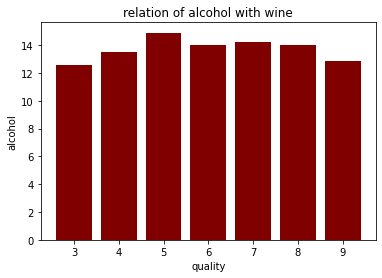

In [9]:
plt.bar(data['quality'],data['alcohol'],color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

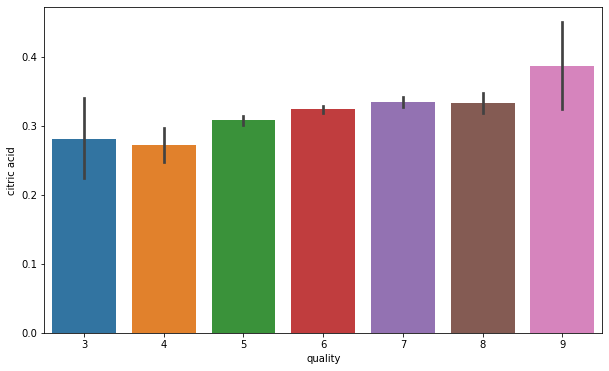

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x= 'quality', y = 'citric acid', data = data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

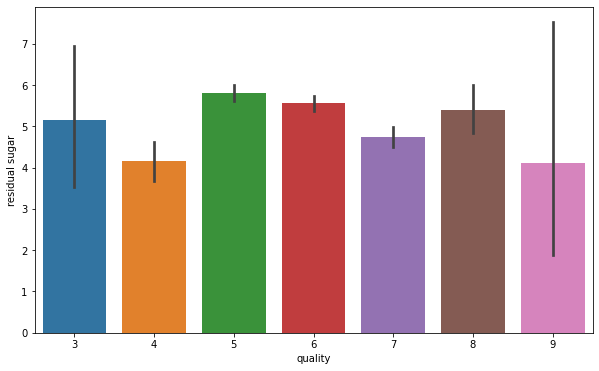

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x= 'quality', y = 'residual sugar', data = data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

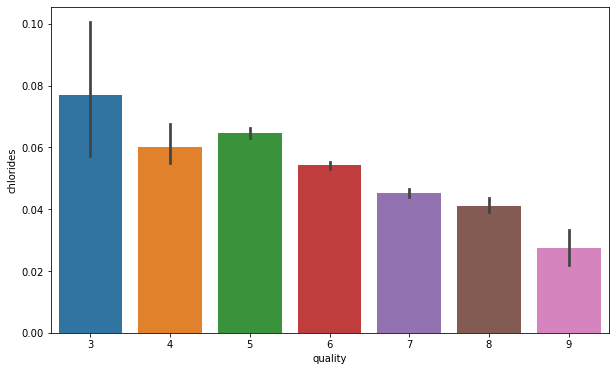

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x= 'quality', y = 'chlorides', data = data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

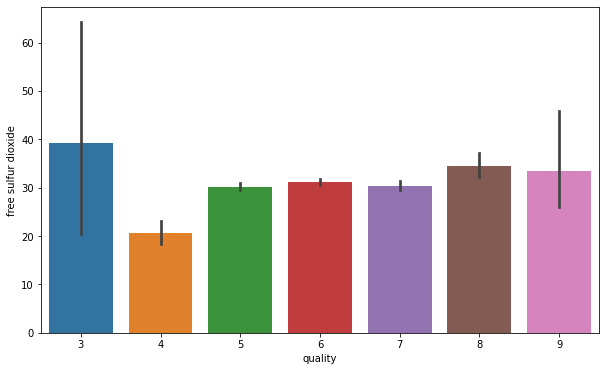

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x= 'quality', y = 'free sulfur dioxide', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

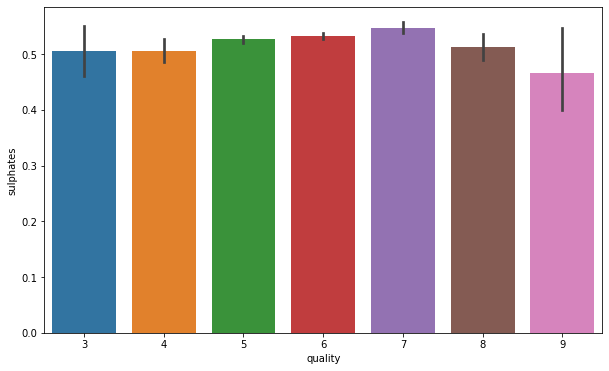

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x= 'quality', y = 'sulphates', data = data)

<AxesSubplot:>

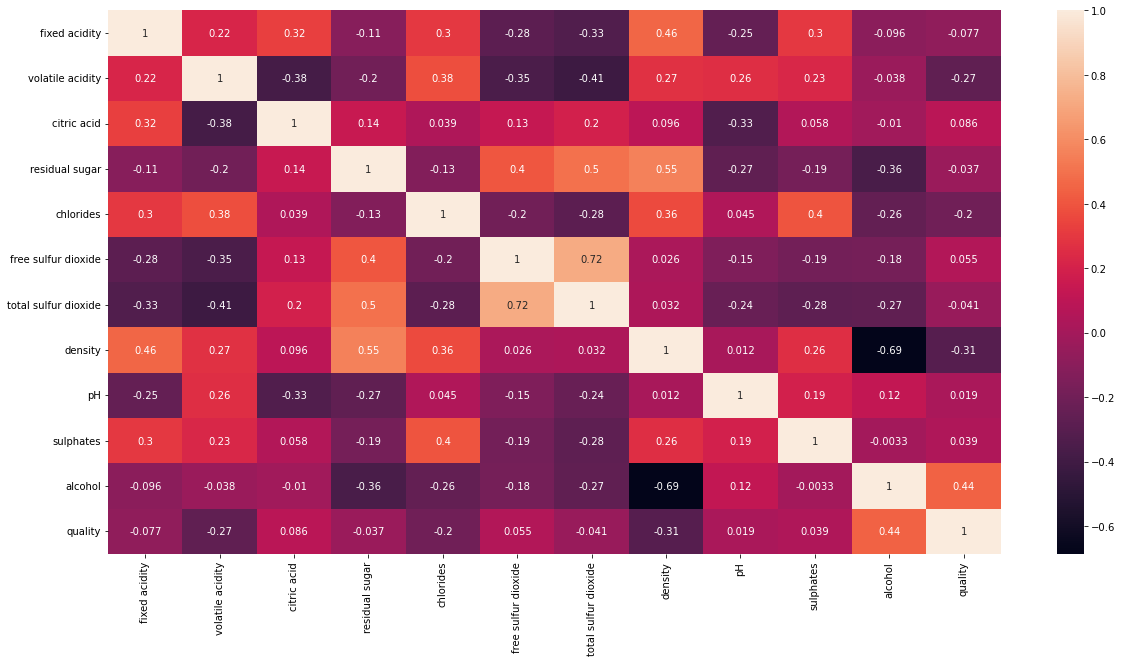

In [15]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

In [16]:
#Descrptive Analysis
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [17]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
data = data.drop(['volatile acidity','total sulfur dioxide','chlorides','density'],axis = 1)
print(data.shape)
 

(6497, 9)


In [19]:
data['quality']=data['quality'].map({3 :'bad', 4 :'bad',5 :'bad',6 :'good',7 :'good',8 :'good'})
data['quality'].value_counts()                           

good    4108
bad     2384
Name: quality, dtype: int64

In [20]:
data.isnull().any()

type                   False
fixed acidity           True
citric acid             True
residual sugar          True
free sulfur dioxide    False
pH                      True
sulphates               True
alcohol                False
quality                 True
dtype: bool

In [21]:
data.isnull().sum()

type                    0
fixed acidity          10
citric acid             3
residual sugar          2
free sulfur dioxide     0
pH                      9
sulphates               4
alcohol                 0
quality                 5
dtype: int64

In [22]:
data["fixed acidity"].fillna(data["fixed acidity"].mean(),inplace = True)
data["sulphates"].fillna(data["sulphates"].mean(),inplace = True)
data["pH"].fillna(data["pH"].mean(),inplace = True)
data["residual sugar"].fillna(data["residual sugar"].mean(),inplace = True)
data["citric acid"].fillna(data["citric acid"].mean(),inplace = True)
data["quality"].fillna(data["quality"].mode()[0],inplace = True)

In [23]:
data.isnull().sum()

type                   0
fixed acidity          0
citric acid            0
residual sugar         0
free sulfur dioxide    0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [24]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['type'] = le.fit_transform(data['type'])

In [25]:
x = data.iloc[:,:8]
y = data.iloc[:,-1]
print(x.shape)
print(y.shape)

(6497, 8)
(6497,)


In [26]:
x

,type,fixed acidity,citric acid,residual sugar,free sulfur dioxide,pH,sulphates,alcohol
0,1,7.0,0.36,20.7,45.0,3.00,0.450000,8.8
1,1,6.3,0.34,1.6,14.0,3.30,0.490000,9.5
2,1,8.1,0.40,6.9,30.0,3.26,0.440000,10.1
3,1,7.2,0.32,8.5,47.0,3.19,0.400000,9.9
4,1,7.2,0.32,8.5,47.0,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...
6492,0,6.2,0.08,2.0,32.0,3.45,0.580000,10.5
6493,0,5.9,0.10,2.2,39.0,3.52,0.531215,11.2
6494,0,6.3,0.13,2.3,29.0,3.42,0.750000,11.0
6495,0,5.9,0.12,2.0,32.0,3.57,0.710000,10.2


In [27]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4872, 8)
(4872,)
(1625, 8)
(1625,)


In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
def logisticRegression(x_train, x_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('***logisticRegression***')
    print("Traing accuracy :", model.score(x_train,y_train))
    print("Testing accuracy :", model.score(x_test,y_test))
    print('Classification report')
    print(classification_report(y_test,y_pred))
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))

In [30]:
def SGD(x_train,x_test,y_train,y_test):
    model = SGDClassifier(penalty=None)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('***Stochastic Gradient Descent Classifier***')
    print("Training accuracy :",model.score(x_train,y_train))
    print("Testing accuracy :",model.score(x_test,y_test))
    print('Classification report')
    print(classification_report(y_test,y_pred))
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))

In [31]:
def SVClassifier(x_train,x_test,y_train,y_test):
    model = SVC()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('***Support Vector Classifier***')
    print("Training accuracy :",model.score(x_train,y_train))
    print("Testing accuracy :",model.score(x_test,y_test))
    print('Classification report')
    print(classification_report(y_test,y_pred))
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))

In [32]:
def decisionTree(x_train,x_test,y_train,y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print("Training accuracy :",dt.score(x_train,y_train))
    print("Testing accuracy :",dt.score(x_test,y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print('Classification report')
    print(classification_report(y_test,y_pred))

In [33]:
def randomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print("Training accuracy :",rf.score(x_train,y_train))
    print("Testing accuracy :",rf.score(x_test,y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print('Classification report')
    print(classification_report(y_test,y_pred))

In [34]:
def xgboost(x_train,x_test,y_train,y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    y_pred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print("Training accuracy :",xg.score(x_train,y_train))
    print("Testing accuracy :",xg.score(x_test,y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print('Classification report')
    print(classification_report(y_test,y_pred))

In [35]:
def comparemodel(x_train,x_test,y_train,y_test):
    logisticRegression(x_train,x_test,y_train,y_test)
    print('-'*100)
    SGD(x_train,x_test,y_train,y_test)
    print('-'*100)
    SVClassifier(x_train,x_test,y_train,y_test)
    print('-'*100)
    decisionTree(x_train,x_test,y_train,y_test)
    print('-'*100)
    randomForest(x_train,x_test,y_train,y_test)
    print('-'*100)
    xgboost(x_train,x_test,y_train,y_test)
    print('-'*100)


In [36]:
comparemodel(x_train,x_test,y_train,y_test)

***logisticRegression***
Traing accuracy : 0.7066912972085386
Testing accuracy : 0.6916923076923077
Classification report
              precision    recall  f1-score   support

           0       0.58      0.52      0.55       584
           1       0.75      0.79      0.77      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.65      0.66      1625
weighted avg       0.69      0.69      0.69      1625

Confusion matrix
[[304 280]
 [221 820]]
----------------------------------------------------------------------------------------------------
***Stochastic Gradient Descent Classifier***
Training accuracy : 0.7029967159277504
Testing accuracy : 0.6892307692307692
Classification report
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       584
           1       0.75      0.76      0.76      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.66      0.66     

In [37]:
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print("Training accuracy :",rf.score(x_train,y_train))
    print("Testing accuracy :",rf.score(x_test,y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print('Classification report')
    print(classification_report(y_test,y_pred))

***RandomForestClassifier***
Training accuracy : 1.0
Testing accuracy : 0.8172307692307692
Confusion matrix
[[410 174]
 [123 918]]
Classification report
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       584
           1       0.84      0.88      0.86      1041

    accuracy                           0.82      1625
   macro avg       0.80      0.79      0.80      1625
weighted avg       0.81      0.82      0.82      1625



In [38]:
x

,type,fixed acidity,citric acid,residual sugar,free sulfur dioxide,pH,sulphates,alcohol
0,1,7.0,0.36,20.7,45.0,3.00,0.450000,8.8
1,1,6.3,0.34,1.6,14.0,3.30,0.490000,9.5
2,1,8.1,0.40,6.9,30.0,3.26,0.440000,10.1
3,1,7.2,0.32,8.5,47.0,3.19,0.400000,9.9
4,1,7.2,0.32,8.5,47.0,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...
6492,0,6.2,0.08,2.0,32.0,3.45,0.580000,10.5
6493,0,5.9,0.10,2.2,39.0,3.52,0.531215,11.2
6494,0,6.3,0.13,2.3,29.0,3.42,0.750000,11.0
6495,0,5.9,0.12,2.0,32.0,3.57,0.710000,10.2


In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf, x, y, scoring='accuracy', cv = 5)
print(accuracy)#get the mean of each fold
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.70692308 0.74230769 0.73903002 0.73287144 0.36720554]
Accuracy of Model with Cross Validation is: 65.76675549239059


In [40]:
confusion_matrix(y_test,y_pred)

array([[410, 174],
       [123, 918]], dtype=int64)

In [41]:
import pickle
pickle.dump(rf,open('wineQuality_new.pkl','wb')) 